In [2]:
%pip install mplsoccer

  Created wheel for mplsoccer: filename=mplsoccer-0.0.21-cp36-none-any.whl size=32699 sha256=f6dd788bb571db81b205124f7586858f8122f53144b93549593ad9a74dc28ecc
  Stored in directory: /root/.cache/pip/wheels/b4/c3/eb/77c9eb9fd22579e5df94e53c2276e98c57bfc2b73eb4c94281
Successfully built mplsoccer


In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mplsoccer.pitch import Pitch
import seaborn as sns

In [5]:
df = pd.read_csv('bcnvalaves.csv')

In [6]:
riqui = 372827
barca = 65
r_data = df[df["playerId"]==riqui]
r_data

,id,eventId,minute,second,teamId,x,y,expandedMinute,period/value,period/displayName,type/value,type/displayName,outcomeType/value,outcomeType/displayName,isTouch,playerId,qualifiers/0/type/value,qualifiers/0/type/displayName,qualifiers/1/type/value,qualifiers/1/type/displayName,qualifiers/1/value,qualifiers/2/type/value,qualifiers/2/type/displayName,qualifiers/2/value,qualifiers/3/type/value,qualifiers/3/type/displayName,qualifiers/3/value,qualifiers/4/type/value,qualifiers/4/type/displayName,qualifiers/4/value,qualifiers/5/type/value,qualifiers/5/type/displayName,qualifiers/5/value,satisfiedEventsTypes/0,satisfiedEventsTypes/1,satisfiedEventsTypes/2,satisfiedEventsTypes/3,satisfiedEventsTypes/4,satisfiedEventsTypes/5,satisfiedEventsTypes/6,...,qualifiers/7/type/value,qualifiers/7/type/displayName,qualifiers/7/value,satisfiedEventsTypes/7,satisfiedEventsTypes/8,satisfiedEventsTypes/9,satisfiedEventsTypes/10,satisfiedEventsTypes/11,relatedEventId,relatedPlayerId,qualifiers/8/type/value,qualifiers/8/type/displayName,qualifiers/8/value,qualifiers/9/type/value,qualifiers/9/type/displayName,goalMouthZ,goalMouthY,isShot,qualifiers/9/value,qualifiers/10/type/value,qualifiers/10/type/displayName,satisfiedEventsTypes/12,satisfiedEventsTypes/13,qualifiers/10/value,qualifiers/11/type/value,qualifiers/11/type/displayName,qualifiers/11/value,qualifiers/12/type/value,qualifiers/12/type/displayName,qualifiers/13/type/value,qualifiers/13/type/displayName,blockedX,blockedY,satisfiedEventsTypes/14,qualifiers/13/value,qualifiers/14/type/value,qualifiers/14/type/displayName,qualifiers/14/value,isGoal,satisfiedEventsTypes/15
7,2200971995,8,0,14.0,65,39.3,61.2,0,1,FirstHalf,1,Pass,1,Successful,True,372827.0,56.0,Zone,212.0,Length,13.8,213.0,Angle,3.4,178.0,StandingSave,NaN,140.0,PassEndX,26.5,141.0,PassEndY,56.7,90.0,116.0,29.0,34.0,37.0,214.0,217.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2200972039,12,0,28.0,65,51.9,73.3,0,1,FirstHalf,1,Pass,1,Successful,True,372827.0,140.0,PassEndX,213.0,Angle,2.4,56.0,Zone,Back,141.0,PassEndY,87.7,212.0,Length,15.1,3.0,HeadPass,NaN,90.0,116.0,29.0,138.0,34.0,36.0,215.0,...,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,2200972135,23,0,54.0,65,40.7,68.4,0,1,FirstHalf,1,Pass,1,Successful,True,372827.0,212.0,Length,213.0,Angle,1,140.0,PassEndX,51.1,56.0,Zone,Left,141.0,PassEndY,90.9,178.0,StandingSave,NaN,90.0,118.0,116.0,29.0,35.0,36.0,215.0,...,NaN,NaN,NaN,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,2200972295,38,1,44.0,65,68.7,60.0,1,1,FirstHalf,1,Pass,1,Successful,True,372827.0,155.0,Chipped,213.0,Angle,4.8,178.0,StandingSave,NaN,56.0,Zone,Center,141.0,PassEndY,40.6,140.0,PassEndX,69.8,90.0,118.0,116.0,29.0,123.0,204.0,35.0,...,NaN,NaN,NaN,37.0,216.0,217.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44,2200972317,41,1,54.0,65,72.2,70.2,1,1,FirstHalf,7,Tackle,0,Unsuccessful,True,372827.0,286.0,Offensive,56.0,Zone,Center,178.0,StandingSave,NaN,233.0,OppositeRelatedEvent,11,NaN,NaN,NaN,NaN,NaN,NaN,90.0,141.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,2201014573,1031,89,59.0,65,56.0,100.0,91,2,SecondHalf,1,Pass,1

In [8]:
xstart = []
ystart = []
xend = []
yend = []
names = ['x','y']

passes = r_data.loc[r_data['type/displayName'] == 'Pass'] # select rows based on condition
xstart = passes['x'].values #df -> np.array
ystart = passes['y'].values
    
df = pd.DataFrame(data=[xstart,ystart],index=names)
df = df.T

In [9]:
df

,x,y
0,39.3,61.2
1,51.9,73.3
2,40.7,68.4
3,68.7,60.0
4,64.0,85.1
...,...,...
65,56.0,100.0
66,39.3,91.7
67,41.8,91.5
68,39.4,72.9


In [14]:
def draw_field():
    #create basic lines
    plt.plot([0,0],[0,100],color='white')
    plt.plot([0,100],[0,0],color='white')
    plt.plot([100,0],[100,100],color='white')
    plt.plot([100,100],[0,100],color='white')
    plt.plot([50,50],[0,100],color='white')
    #right side box
    #inner
    plt.plot([94,94],[56,44],color='white')
    plt.plot([94,100],[56,56],color='white')
    plt.plot([94,100],[44,44],color='white')
    plt.scatter(88,50,color='white',s=10)

    #outer
    plt.plot([82,82],[72,28],color='white')
    plt.plot([82,100],[72,72],color='white')
    plt.plot([82,100],[28,28],color='white')

    #left side box
    #inner
    plt.plot([0,6],[56,56],color='white')
    plt.plot([0,6],[44,44],color='white')
    plt.plot([6,6],[56,44],color='white')
    plt.scatter(12,50,color='white',s=10)

    #Outer
    plt.plot([18,18],[72,28],color='white')
    plt.plot([0,18],[72,72],color='white')
    plt.plot([0,18],[28,28],color='white')

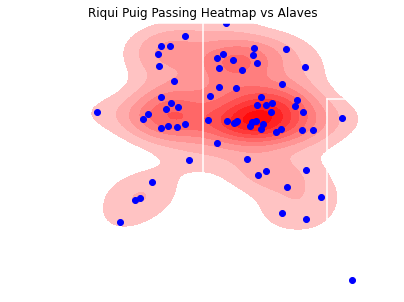

In [61]:
fig, ax = plt.subplots()
fig.set_size_inches(7, 5)

#plt.hist2d(xstart,ystart,bins=5)
#np.histogram2d(xstart,ystart)

kde = sns.kdeplot(xstart,
            ystart,
            shade=True,
            color='red',
            shade_lowest=False
            )

draw_field()
plt.scatter(df['x'], df['y'], color='blue') #you can pass arrays and dataframes here
#plt.annotate([df['x'][x],df['y'][x]],'72.5,60.8')
    
#plt.scatter(92.5,44.5,color='red')


plt.title('Riqui Puig Passing Heatmap vs Alaves')
plt.axis('off')
plt.ylim(0, 100) # need this, otherwise kde plot will go outside
plt.xlim(0, 100)

plt.savefig('riqui2.png', dpi=300)

(array([[0., 0., 1., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 2., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 1., 0., 2., 2., 2., 2., 2.],
        [0., 0., 0., 0., 1., 1., 2., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 1., 2., 3., 0.],
        [0., 0., 0., 0., 1., 1., 4., 1., 2., 1.],
        [0., 0., 0., 0., 2., 2., 7., 1., 2., 1.],
        [0., 0., 1., 1., 0., 1., 1., 2., 0., 1.],
        [0., 0., 1., 1., 1., 2., 1., 0., 1., 0.],
        [1., 0., 0., 0., 0., 0., 1., 0., 0., 0.]]),
 array([23.1 , 29.62, 36.14, 42.66, 49.18, 55.7 , 62.22, 68.74, 75.26,
        81.78, 88.3 ]),
 array([  5.5 ,  14.95,  24.4 ,  33.85,  43.3 ,  52.75,  62.2 ,  71.65,
         81.1 ,  90.55, 100.  ]),
 <matplotlib.collections.QuadMesh at 0x7fa92402b790>)

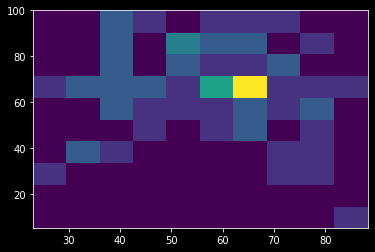

In [ ]:
plt.hist2d(xstart,ystart)